## Titanic

### Titanic Dataset
#### Brief description of Dataset and summary of it's attributes:

The titanic dataset describes the survival status of individual passengers on board. I have taken dataset from Kaggle.
The variables in dataset are :
 * passenger_id - ID of passenger
 * pclass - pclass refers to passenger class - 1 - Upper, 2 - Middle, 3 - Lower
 * name - name of passenger
 * sex - Male or Female
 * age - Age of passengers in year
 * sibsp - Number of siblings/Spouses 
 * parch - Number of Parents/Children
 * ticket - Ticket number
 * fare - Fare
 * cabin - Cabin
 * embarked - Port of embarkation -> C = Cherbourg, Q = Queenstown,S = Southampton
 * boat - Lifeboat
 * body - Body identification number
 * home.dest - Home/Destination
 * survived - Survival Status (0 = No, 1 = Yes)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


### Initial plan for Data Exploration

 * 1. We will do some Basic Data Exploration and check null values.
 * 2. We will do some exploratory data analysis for checking relation of some variables with survival status.
 * 3. Then we will do feature engineering and null value treatment
 * 4. Then we will convert some categorical variables into numeric type
 * 5. We will do one Hot encoding for some categorical variables.

##### Basic Data Exploration

In [3]:
titanic.shape

(850, 15)

In [4]:
titanic.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
passenger_id    850 non-null int64
pclass          850 non-null int64
name            850 non-null object
sex             850 non-null object
age             676 non-null float64
sibsp           850 non-null int64
parch           850 non-null int64
ticket          850 non-null object
fare            849 non-null float64
cabin           191 non-null object
embarked        849 non-null object
boat            308 non-null object
body            73 non-null float64
home.dest       464 non-null object
survived        850 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
# Checking null values - Note that there are some columns which have null values which we will treat later
titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

#### Exploratory Data Analysis

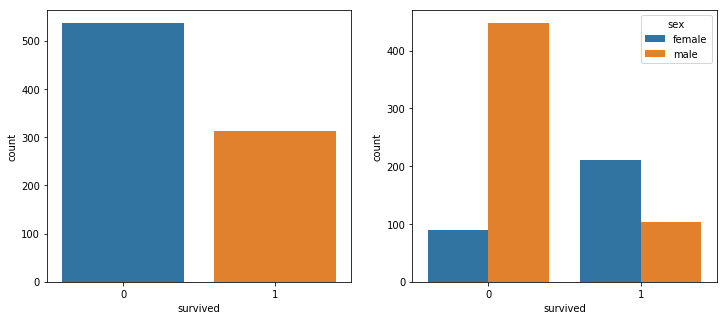

In [7]:
# We will plot distribution of survival status
# We can see that around 40% passengers survived
# Female passenger' survival count is approximately twice than males passengers

fig, (ax1, ax2) =  plt.subplots(1,2, figsize = (12,5))
sns.countplot(x = 'survived', data = titanic, ax = ax1)
sns.countplot(x = 'survived', data = titanic, hue = 'sex', ax = ax2)

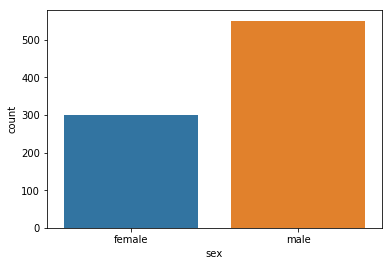

In [8]:
# Let us plot distribution of passengers on boat
# Number of male passenger was high

sns.countplot(x='sex', data = titanic)

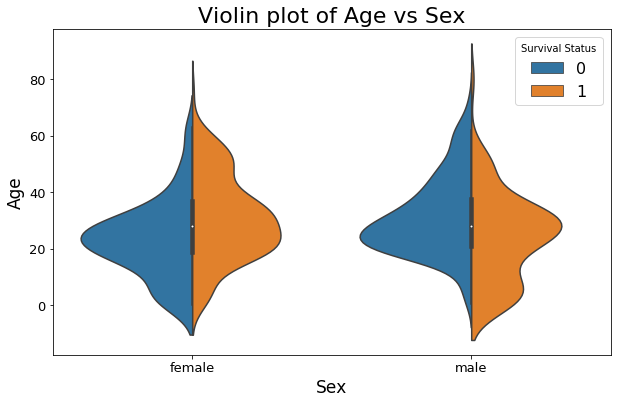

In [9]:
# Plotting violin plot we see that Survival rate is:
# Good for children
# High for women and
# Low for men

fig, ax = plt.subplots(figsize = (10,6))
f = sns.violinplot(x ='sex', y ='age', hue ='survived', data = titanic, split = True, ax=ax)

f.axes.set_title('Violin plot of Age vs Sex',fontsize=22)
f.set_xlabel('Sex',fontsize=17)
f.set_ylabel('Age',fontsize=17)
f.tick_params(labelsize=13)
plt.legend(title='Survival Status', fontsize = 16)
plt.show()

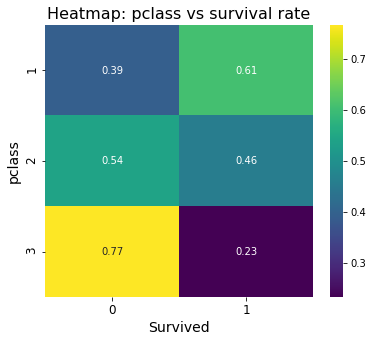

In [10]:
# Now we will plot survival status with respect to class
# It is seen that high class passengers had higher survuval rate than low class passengers

class_count = titanic.groupby(['pclass']).count()['survived']
group = titanic.groupby(['pclass', 'survived'])
pclass_survived = (group.size()/class_count).unstack()

fig, ax = plt.subplots(figsize = (6,5))
f = sns.heatmap(pclass_survived, annot = True, ax = ax, cmap='viridis')

f.axes.set_title('Heatmap: pclass vs survival rate',fontsize = 16)
f.set_xlabel('Survived',fontsize = 14)
f.set_ylabel('pclass',fontsize = 14)
f.tick_params(labelsize = 12)
plt.show()

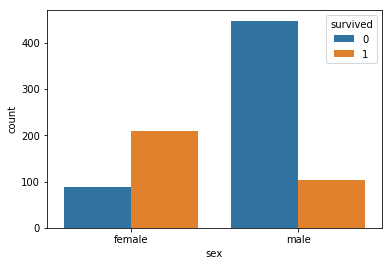

In [11]:
# Below countplot gives interesting finding
sns.countplot(x = 'sex', data = titanic, hue = 'survived')

### Feature Engineering and Missing Value Treatment

In [12]:
# Title feature

titanic['title'] = titanic.name.str.extract(' ([A-Za-z]+)\.')

titanic.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,title
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,Miss
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,Mr


In [13]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,3
Countess,1,0
Dr,1,5
Jonkheer,0,1
Major,0,2
Master,0,46
Miss,171,0
Mlle,1,0


In [14]:
# The number of passengers with each title is shown above.
# We now replace some less common titles with the name "Other" & replace others as given below.

titanic['title'] = titanic['title'].replace(['Countess','Capt', 'Col', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Other')
titanic['title'] = titanic['title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

pd.crosstab(titanic['title'], titanic['sex'])  # Later we will encode this variable

sex,female,male
title,,
Master,0,46
Miss,173,0
Mr,0,488
Mrs,124,0
Other,2,17


In [15]:
# Embarked Feature
# There are a few null values for Embarked column. The empty values are represented as "nan" in below list.

titanic.embarked.unique()

array(['Q', 'S', 'C', nan], dtype=object)

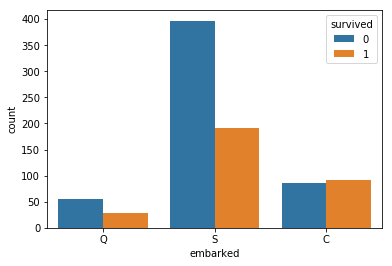

In [16]:
# C = Cherbourg, Q = Queenstown,S = Southampton
# Most of passengers boarded from Southampton
# People boarded from port Cherbourg had higher chances of survival

sns.countplot(x ='embarked', hue ='survived',data = titanic)

In [17]:
# We find that category "S" has maximum passengers. Hence, we replace "nan" values with "S".

titanic['embarked'] = titanic['embarked'].fillna('S')
titanic.embarked.value_counts()

S    590
C    176
Q     84
Name: embarked, dtype: int64

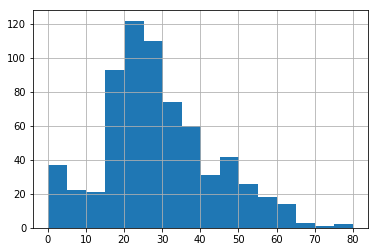

In [18]:
# Age feature

# A good number of passengers were from age group 15 to 30. Age feature is right skewed.
titanic.age.hist(bins=16)

In [19]:
# Age feature
# We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).
# We then create a new column named AgeBand. This categorizes age into 5 different age range.

age_avg = titanic['age'].mean()
age_std = titanic['age'].std()
age_null_count = titanic['age'].isnull().sum()

age_null_count

174

In [20]:
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
with warnings.catch_warnings(record=True):
    titanic['age'][np.isnan(titanic['age'])] = age_null_random_list
#titanic['age'] = titanic['age'].astype(int)
titanic.age = titanic.age.astype(int)

In [21]:
titanic['age'].isnull().sum()

0

In [22]:
titanic['AgeBand'] = pd.cut(titanic['age'], 5)
print (titanic[['AgeBand', 'survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  survived
0  (-0.08, 16.0]  0.500000
1   (16.0, 32.0]  0.336264
2   (32.0, 48.0]  0.341584
3   (48.0, 64.0]  0.453333
4   (64.0, 80.0]  0.250000


In [23]:
# Now, we map Age according to AgeBand.

titanic.loc[ titanic['age'] <= 16, 'age'] = 0
titanic.loc[(titanic['age'] > 16) & (titanic['age'] <= 32), 'age'] = 1
titanic.loc[(titanic['age'] > 32) & (titanic['age'] <= 48), 'age'] = 2
titanic.loc[(titanic['age'] > 48) & (titanic['age'] <= 64), 'age'] = 3
titanic.loc[ titanic['age'] > 64, 'age'] = 4

titanic.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,title,AgeBand
0,1216,3,"Smyth, Miss. Julia",female,1,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,Miss,"(16.0, 32.0]"
1,699,3,"Cacic, Mr. Luka",male,2,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,Mr,"(32.0, 48.0]"


In [24]:
# Fare feature

# As fare is categorical variable replace missing Fare values with the median of Fare.

titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

In [25]:
# Create new column FareBand. We divide the Fare into 4 category range.

titanic['FareBand'] = pd.qcut(titanic['fare'], 4)
print (titanic[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean())

            FareBand  survived
0    (-0.001, 7.896]  0.207048
1    (7.896, 14.108]  0.285000
2   (14.108, 30.924]  0.433333
3  (30.924, 512.329]  0.553991


In [26]:
# Map Fare according to FareBand

titanic.loc[ titanic['fare'] <= 7.896, 'fare'] = 0
titanic.loc[(titanic['fare'] > 7.896) & (titanic['fare'] <= 14.108), 'fare'] = 1
titanic.loc[(titanic['fare'] > 14.108) & (titanic['fare'] <= 30.924), 'fare']   = 2
titanic.loc[ titanic['fare'] > 30.924, 'fare'] = 3
titanic['fare'] = titanic['fare'].astype(int)

titanic.head(3)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,title,AgeBand,FareBand
0,1216,3,"Smyth, Miss. Julia",female,1,0,0,335432,0,NaN,Q,13,NaN,NaN,1,Miss,"(16.0, 32.0]","(-0.001, 7.896]"
1,699,3,"Cacic, Mr. Luka",male,2,0,0,315089,1,NaN,S,NaN,NaN,Croatia,0,Mr,"(32.0, 48.0]","(7.896, 14.108]"
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,1,1,1,345773,2,NaN,S,NaN,NaN,NaN,0,Mrs,"(16.0, 32.0]","(14.108, 30.924]"


In [27]:
# SibSp & Parch Feature
# Combining SibSp & Parch feature, we create a new feature named FamilySize.

titanic['FamilySize'] = titanic['sibsp'] +  titanic['parch'] + 1
print (titanic[['FamilySize', 'survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  survived
0           1  0.294004
1           2  0.537415
2           3  0.549020
3           4  0.586207
4           5  0.333333
5           6  0.133333
6           7  0.222222
7           8  0.000000
8          11  0.000000


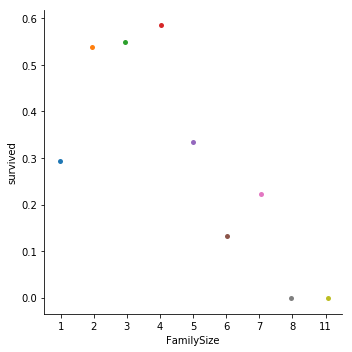

In [28]:
# From below plot it is clear that being alone or having family size greater than 4 had low chances of survival

fs = titanic[['FamilySize', 'survived']].groupby(['FamilySize']).mean().reset_index()
sns.catplot(x = 'FamilySize', y = 'survived', data = fs)

In [29]:
# Let's create a new feature named IsAlone. 
# This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.

titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

print (titanic[['IsAlone', 'survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  survived
0        0  0.483483
1        1  0.294004


In [30]:
# Feature selection
# We drop unnecessary columns/features and keep only the useful ones for our experiment.

titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           659
embarked          0
boat            542
body            777
home.dest       386
survived          0
title             0
AgeBand           0
FareBand          0
FamilySize        0
IsAlone           0
dtype: int64

In [31]:
features_drop = ['passenger_id', 'name', 'sibsp', 'parch', 'ticket', 'cabin', 'boat',
                 'body', 'home.dest', 'AgeBand', 'FareBand', 'FamilySize']
titanic.drop(features_drop, axis=1, inplace = True)

titanic.head(1)

,pclass,sex,age,fare,embarked,survived,title,IsAlone
0,3,female,1,0,Q,1,Miss,1


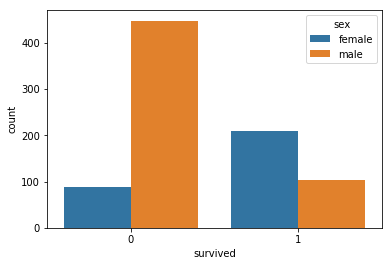

In [32]:
# Survival with respect to sex

sns.countplot(titanic.survived, hue=titanic.sex)

#### One-hot encoding for dummy variables:

In [33]:
# Get a Series consisting of all the categorical column names
one_hot_encode_cols = titanic.dtypes[titanic.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

titanic[one_hot_encode_cols].head().T

,0,1,2,3,4
sex,female,male,female,female,male
embarked,Q,S,S,S,S
title,Miss,Mr,Mrs,Mrs,Mr


In [34]:
# Do the one hot encoding
titanic = pd.get_dummies(titanic, columns = one_hot_encode_cols, drop_first = True)
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,850.0,2.320000,0.838530,1.0,2.0,3.0,3.00,3.0
age,850.0,1.312941,0.841193,0.0,1.0,1.0,2.00,4.0
fare,850.0,1.484706,1.134272,0.0,0.0,2.0,2.75,3.0
survived,850.0,0.368235,0.482610,0.0,0.0,0.0,1.00,1.0
IsAlone,850.0,0.608235,0.488432,0.0,0.0,1.0,1.00,1.0
sex_male,850.0,0.648235,0.477802,0.0,0.0,1.0,1.00,1.0
embarked_Q,850.0,0.098824,0.298601,0.0,0.0,0.0,0.00,1.0
embarked_S,850.0,0.694118,0.461051,0.0,0.0,1.0,1.00,1.0
title_Miss,850.0,0.203529,0.402860,0.0,0.0,0.0,0.00,1.0
title_Mr,850.0,0.574118,0.494767,0.0,0.0,1.0,1.00,1.0


In [35]:
titanic.head(2)

,pclass,age,fare,survived,IsAlone,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,3,1,0,1,1,0,1,0,1,0,0,0
1,3,2,1,0,1,1,0,1,0,1,0,0


In [36]:
titanic.isnull().sum()

pclass         0
age            0
fare           0
survived       0
IsAlone        0
sex_male       0
embarked_Q     0
embarked_S     0
title_Miss     0
title_Mr       0
title_Mrs      0
title_Other    0
dtype: int64

In [37]:
# Data is clean now for modelling

### 3 hypothesis about this data

1. Null Hypothesis: The gender of passenger do not have effect on survival rate
   Alternative Hypothesis: The gender of passenger do have effect on survival rate

2. Null Hypothesis: The port of embarkaation do not affect survival rate
   Alternative Hypothesis: The port of embarkation do have an effect on survival rate.

3. Null Hypothesis: High class of people do not have effect on survival rate
   Alternative Hypothesis: High class of people do have effect on the survival rate
   
We will conduct significance test for 3rd hypothesis:
* Null Hypothesis: High class of people do not have effect on survival rate
* Alternative Hypothesis: High class of people do have effect on the survival rate

### Significance test for 3rd hypothesis
We will do Z test for testing hypothesis. For z test we need normally distributed samples hence take 100 means from the data.

In [38]:
First_Class_Sample = np.array([np.mean(titanic[titanic["pclass"]==1].sample(20)["survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(titanic[titanic["pclass"]==3].sample(20)["survived"].values) for i in range(100)])

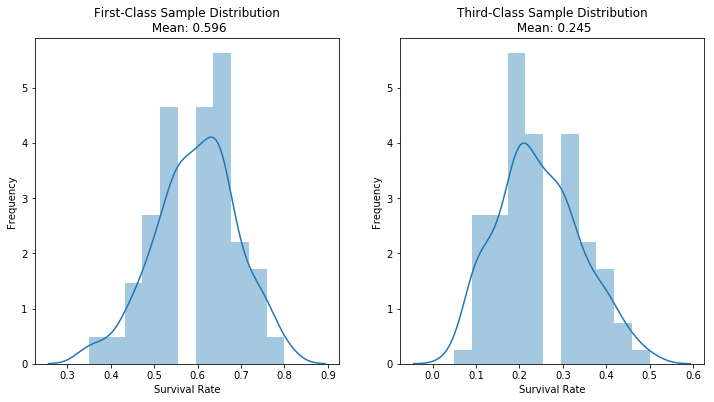

In [39]:
plt.subplots(1, 2, figsize = (12, 6))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)
#ax.vlines(5, 0, 10, color='red')
plt.title("First-Class Sample Distribution\n Mean: {:.3f}".format(np.mean(First_Class_Sample)))
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.distplot(third_Class_Sample)
plt.title("Third-Class Sample Distribution\n Mean: {:.3f}".format(np.mean(third_Class_Sample)))
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [40]:
# According to the sample distributions, the effect of the class is 0.608–0.239 = 0.369

effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference

In [41]:
from scipy import stats as st
pvalue = st.norm.sf(abs(z_score))*2
pvalue

2.5899130773153576e-150

In [42]:
print("The p value ({}) is smaller than, alpha = 0.05, hence we can reject the null hypothesis!".format(pvalue))

The p value (2.5899130773153576e-150) is smaller than, alpha = 0.05, hence we can reject the null hypothesis!


### Suggestions for next steps in analyzing this data
Analyst can compare other variables with Survival rate and visualize relationships among them. Also other hypothesis can be tested using z or t tests.

### Summary

The titanic dataset is formulated by humans hence there is some chance or errors while recording data. There are many null values in some columns. These columns can be checked if those are important for prediction of survival rate. If not these columns can be dropped.
If there is a different source of data than Kaggle request you to provide links.